# Comparing Computation Times of Different Linear Algebra Operations

Consider the quadratic objective function:
$$ f(x) = x^TAx + b^Tx $$
where $A$ is a positive definite matrix, $b$ is a vector. This objective function is strongly convex, and therefore has a unique global minimum. Suppose we want to apply gradient descent to find this minimum.

Is it worth it to compute all eigenvalues of $A$ to get the Lipschitz constant for the quadratic objective? Is there a specialized algorithm to compute the largest eigenvalue directly? How does the computation time of computing the minimum compares to that of computing the largest eigenvalue?
In this notebook, we aim to answer these questions by comparing the computational times of three different linear algebra operations, namely:

1. Solving a linear system using numpy's `linalg.solve`.
2. Calculating the largest eigenvalue of a matrix using scipy's `sparse.linalg.eigs`.
3. Computing all eigenvalues of a matrix and then finding the largest one using numpy's `linalg.eigh`.

To do this, we perform these operations on positive definite matrices of varying sizes, and observe how the computation times scale with the size of the matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
import time

# Generate a random positive definite matrix
def gen_pos_def_matrix(n):
    A = np.random.rand(n, n)
    return np.dot(A, A.transpose())

The function `gen_pos_def_matrix` generates a positive-definite matrix by creating a random matrix and multiplying it with its transpose. This is to ensure that all matrices used in this notebook are positive-definite.

Now, let's go ahead and perform the three operations on matrices of increasing size.

In [2]:
# range of n values
n_values = range(1000, 8001, 500)

# lists to store times
solve_times = []
eig_times = []
all_eig_times = []

for n in n_values:
    # Create a positive definite matrix and a random vector
    A = gen_pos_def_matrix(n)
    b = np.random.rand(n)

    # Compute the exact solution of the quadratic objective using linalg.solve and time it
    start_time = time.process_time()
    x = np.linalg.solve(A, -b)
    end_time = time.process_time()
    solve_time = end_time - start_time
    solve_times.append(solve_time)
    print(f"Time to solve the linear system for n = {n}: {solve_time} seconds")

    # Compute the largest eigenvalue of A using eigs and time it
    start_time = time.process_time()
    largest_eigval = eigs(A, k=1, which='LM', return_eigenvectors=False)[0]
    end_time = time.process_time()
    eig_time = end_time - start_time
    eig_times.append(eig_time)
    print(f"Time to compute the largest eigenvalue using eigs for n = {n}: {eig_time} seconds")

    # Compute all eigenvalues, then take the max (the 'all' way) and time it
    start_time = time.process_time()
    all_eigvals = np.linalg.eigh(A)[0]
    largest_eigval_all = all_eigvals[-1]
    end_time = time.process_time()
    all_eig_time = end_time - start_time
    all_eig_times.append(all_eig_time)
    print(f"Time to compute the largest eigenvalue the 'all' way for n = {n}: {all_eig_time} seconds")

Time to solve the linear system for n = 1000: 0.015625 seconds
Time to compute the largest eigenvalue using eigs for n = 1000: 0.0 seconds
Time to compute the largest eigenvalue the 'all' way for n = 1000: 0.109375 seconds
Time to solve the linear system for n = 1500: 0.25 seconds
Time to compute the largest eigenvalue using eigs for n = 1500: 0.0 seconds
Time to compute the largest eigenvalue the 'all' way for n = 1500: 1.046875 seconds
Time to solve the linear system for n = 2000: 0.234375 seconds
Time to compute the largest eigenvalue using eigs for n = 2000: 0.109375 seconds
Time to compute the largest eigenvalue the 'all' way for n = 2000: 2.015625 seconds
Time to solve the linear system for n = 2500: 0.515625 seconds
Time to compute the largest eigenvalue using eigs for n = 2500: 0.15625 seconds
Time to compute the largest eigenvalue the 'all' way for n = 2500: 3.546875 seconds
Time to solve the linear system for n = 3000: 0.796875 seconds
Time to compute the largest eigenvalue u

After running the cell above, we should have the computation times for the three operations stored in the `solve_times`, `eig_times`, and `all_eig_times` lists.

Now, we can visualize these times to see how they scale with the size of the matrix.

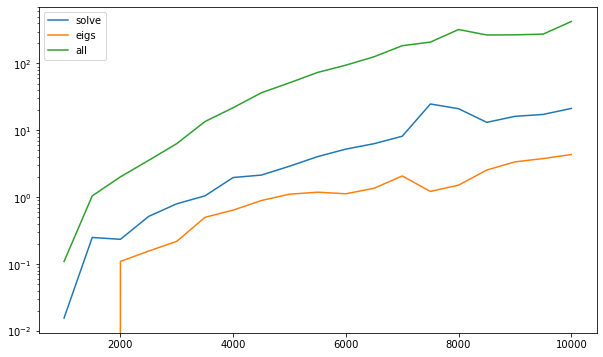

In [7]:
# plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, solve_times, label="solve")
plt.plot(n_values, eig_times, label="eigs")
plt.plot(n_values, all_eig_times, label="all")
plt.yscale('log')
plt.legend()
plt.show()

# Exercise
For the quadratic objective defined above, compare the cost of one gradient descent update with the following stepsizes for different problem sizes:
1. Line search
2. Armijo line search
3. Exact line search